In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from math import ceil
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from cluster_tools import *

random_state = 42
score_types=["silhouette", "calinski_harabasz", "davies_bouldin"]

In [3]:
df_original = pd.read_parquet(path="./../../data/cluster_data/category_seasonal_data.parquet")
df = df_original.copy()
df

,comdate_diff,price,freight_value,commercial_dates_day_since_year_start,commercial_dates_year,commercial_dates_month,commercial_dates_day,order_purchase_day_since_year_start,order_purchase_year,order_purchase_month,order_purchase_day,commercial_date_seazonal_weight,sensitivity,mean_price_by_commercial_date,std_price_by_commercial_date,commercial_date_coded,time_window_order_coded,filtered_category_coded
0,11,289.00,46.48,0,2018,1,1,11,2018,1,12,0.000000,0.000000,92.179011,169.492277,7,1,13
1,-28,259.90,22.31,284,2017,10,12,256,2017,9,14,0.000000,0.000000,116.931149,158.173943,7,1,6
2,-17,14.99,7.78,66,2018,3,8,49,2018,2,19,14.678600,13.587090,106.874941,134.596300,1,0,8
3,17,25.00,14.10,0,2018,1,1,17,2018,1,18,0.000000,0.000000,108.666584,118.364277,7,1,3
4,7,99.90,22.57,0,2018,1,1,7,2018,1,8,3.137149,12.276657,82.903521,59.651270,9,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87849,-8,55.00,20.88,358,2017,12,25,350,2017,12,17,4.880210,6.335680,100.261696,126.620747,6,0,13
87850,3,114.90,14.16,90,2018,4,1,93,2018,4,4,10.360727,10.802792,106.242859,104.834845,8,1,6
87851,7,37.00,19.04,90,2018,4,1,97,2018,4,8,10.360727,9.825480,115.585435,176.533677,8,1,2
87852,-21,689.00,22.07,327,2017,11,24,306,2017,11,3,12.756532,6.704465,204.739577,287.452591,0,0,11


## Visualizando scores com sample de 20% porcento dos dados em formato original

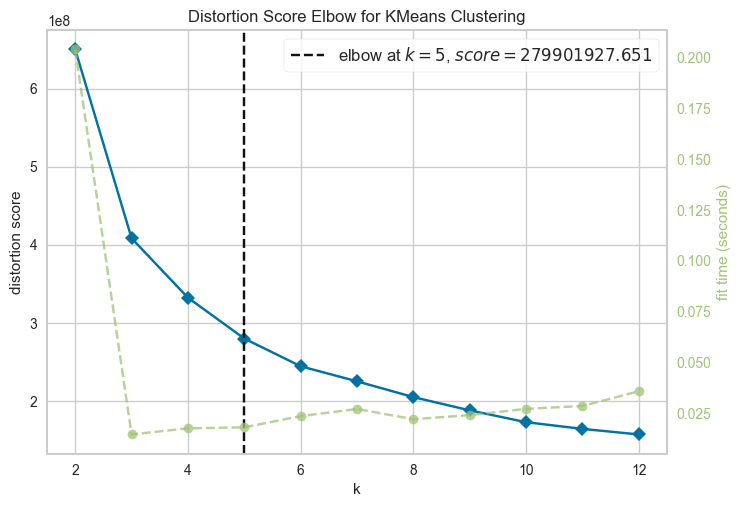

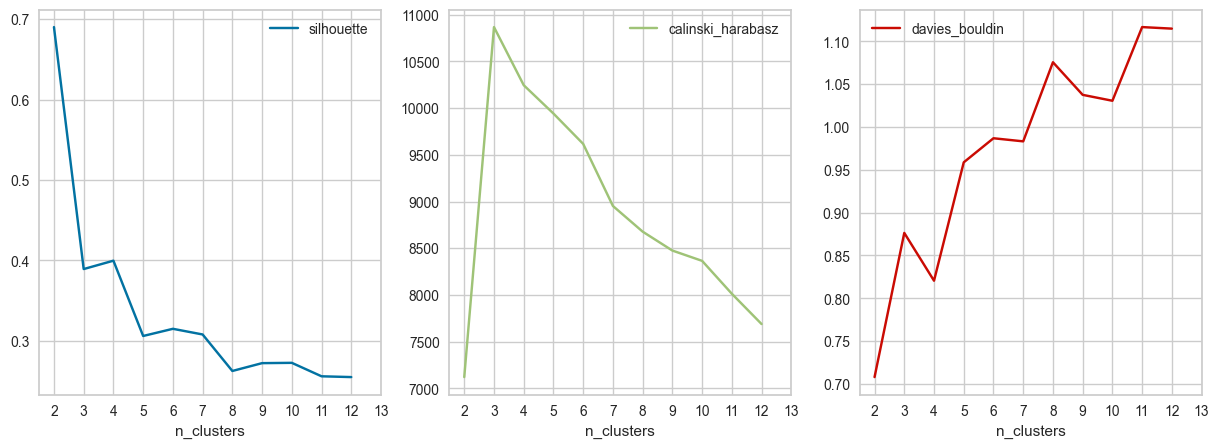

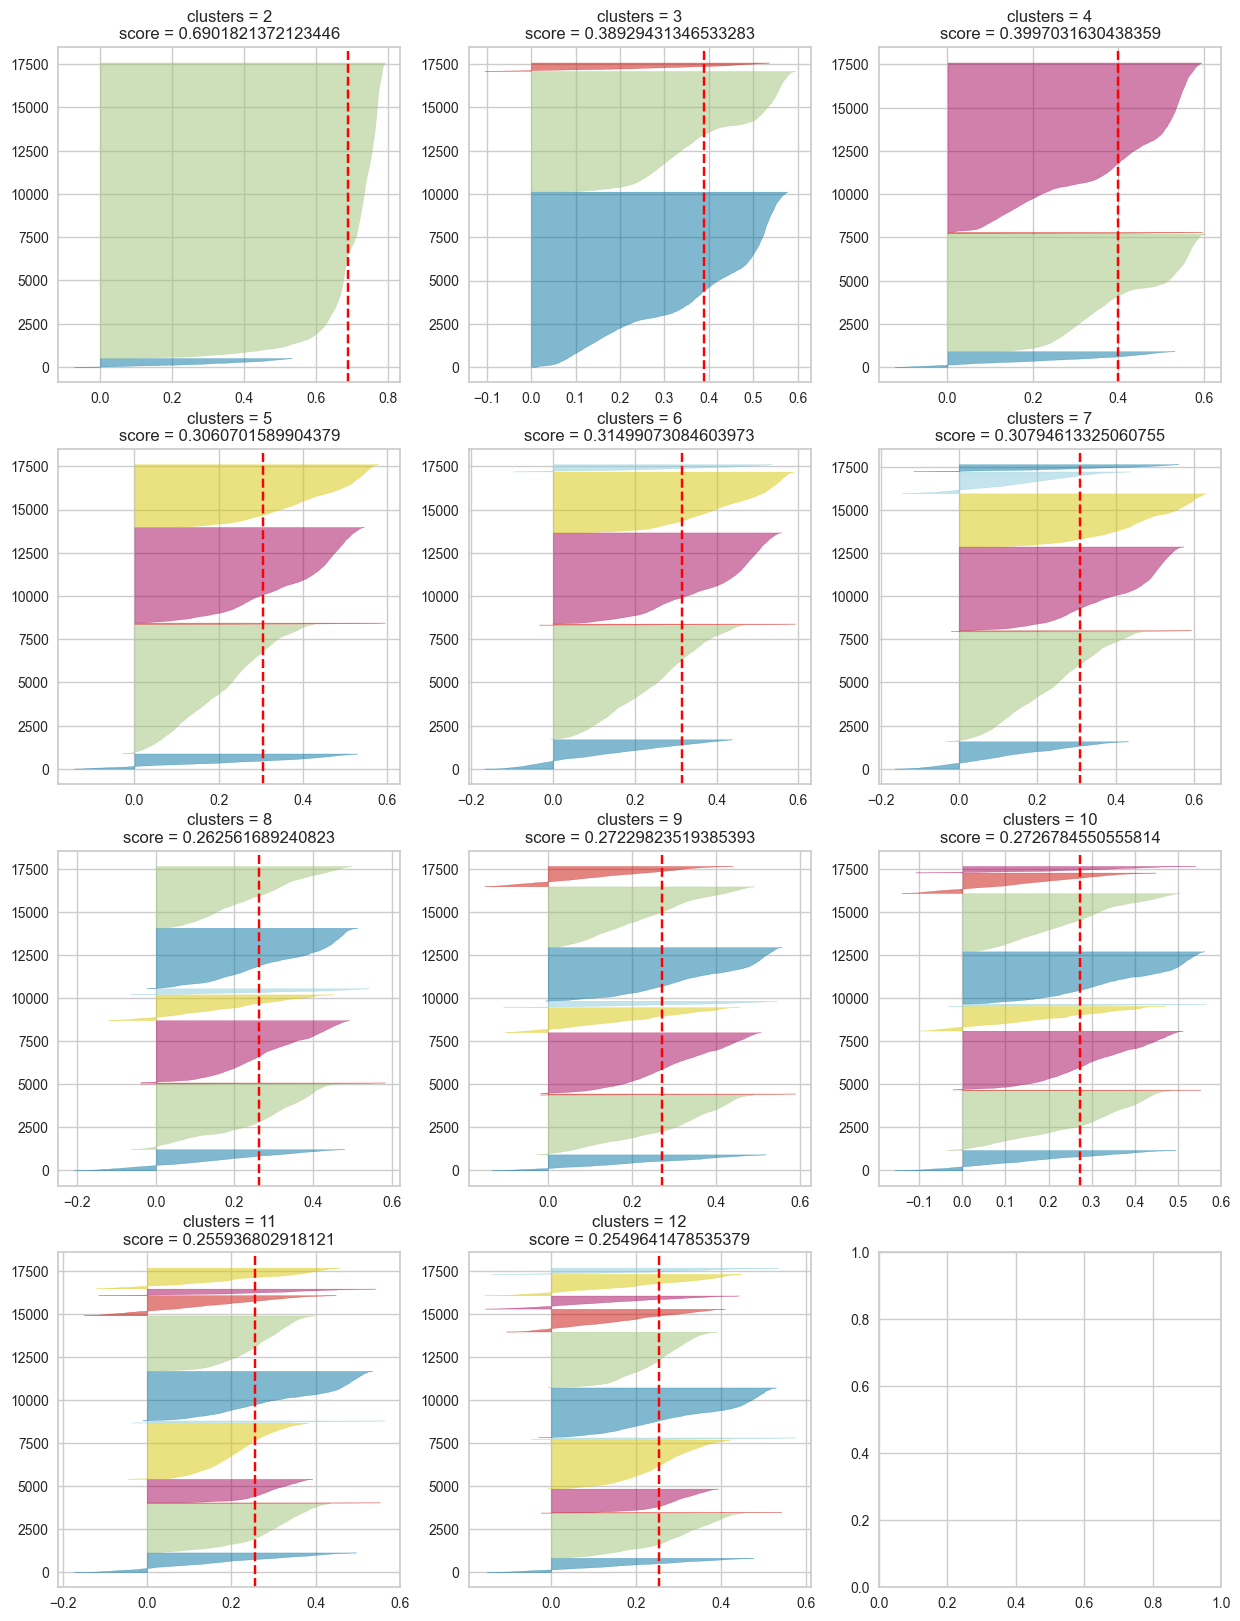

In [3]:
visualize_scores(df, sample_percentual=20, initial_range=2, final_range=13, score_types=score_types, per_col=3)

## Visualizando scores com sample de 20% porcento dos dados em formato normalizado

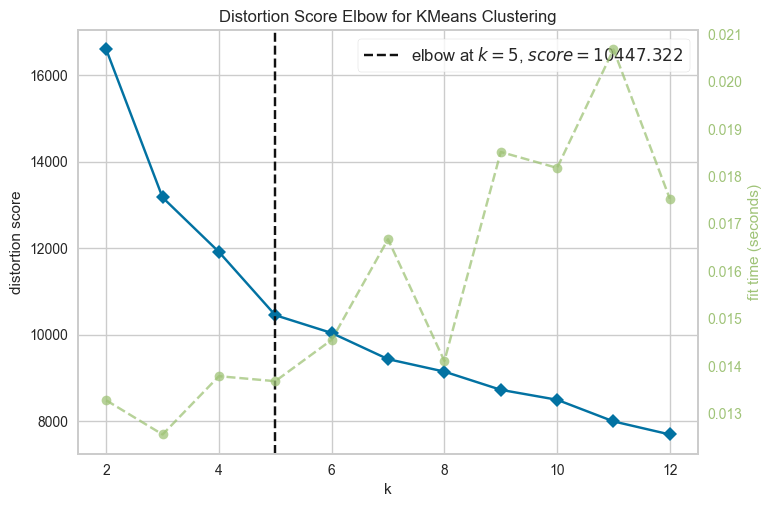

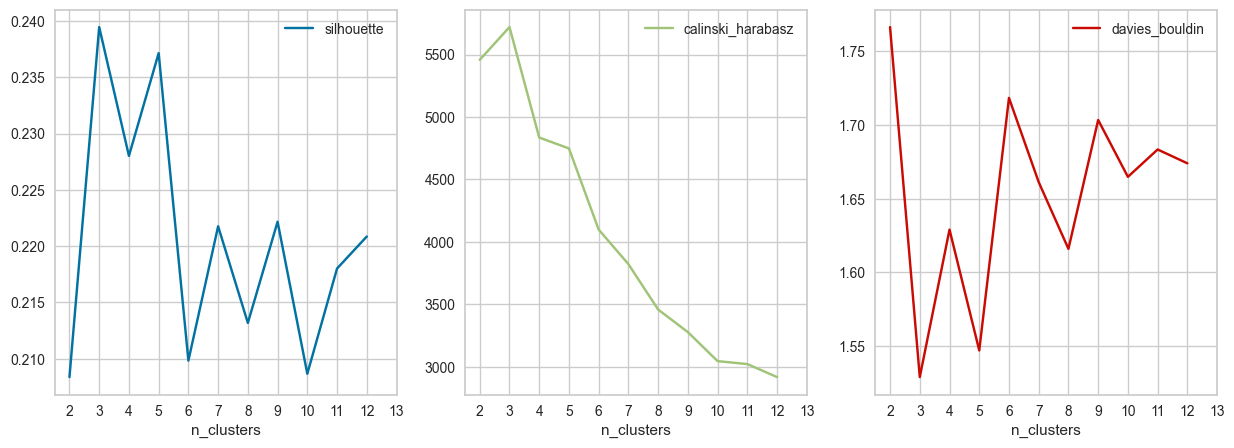

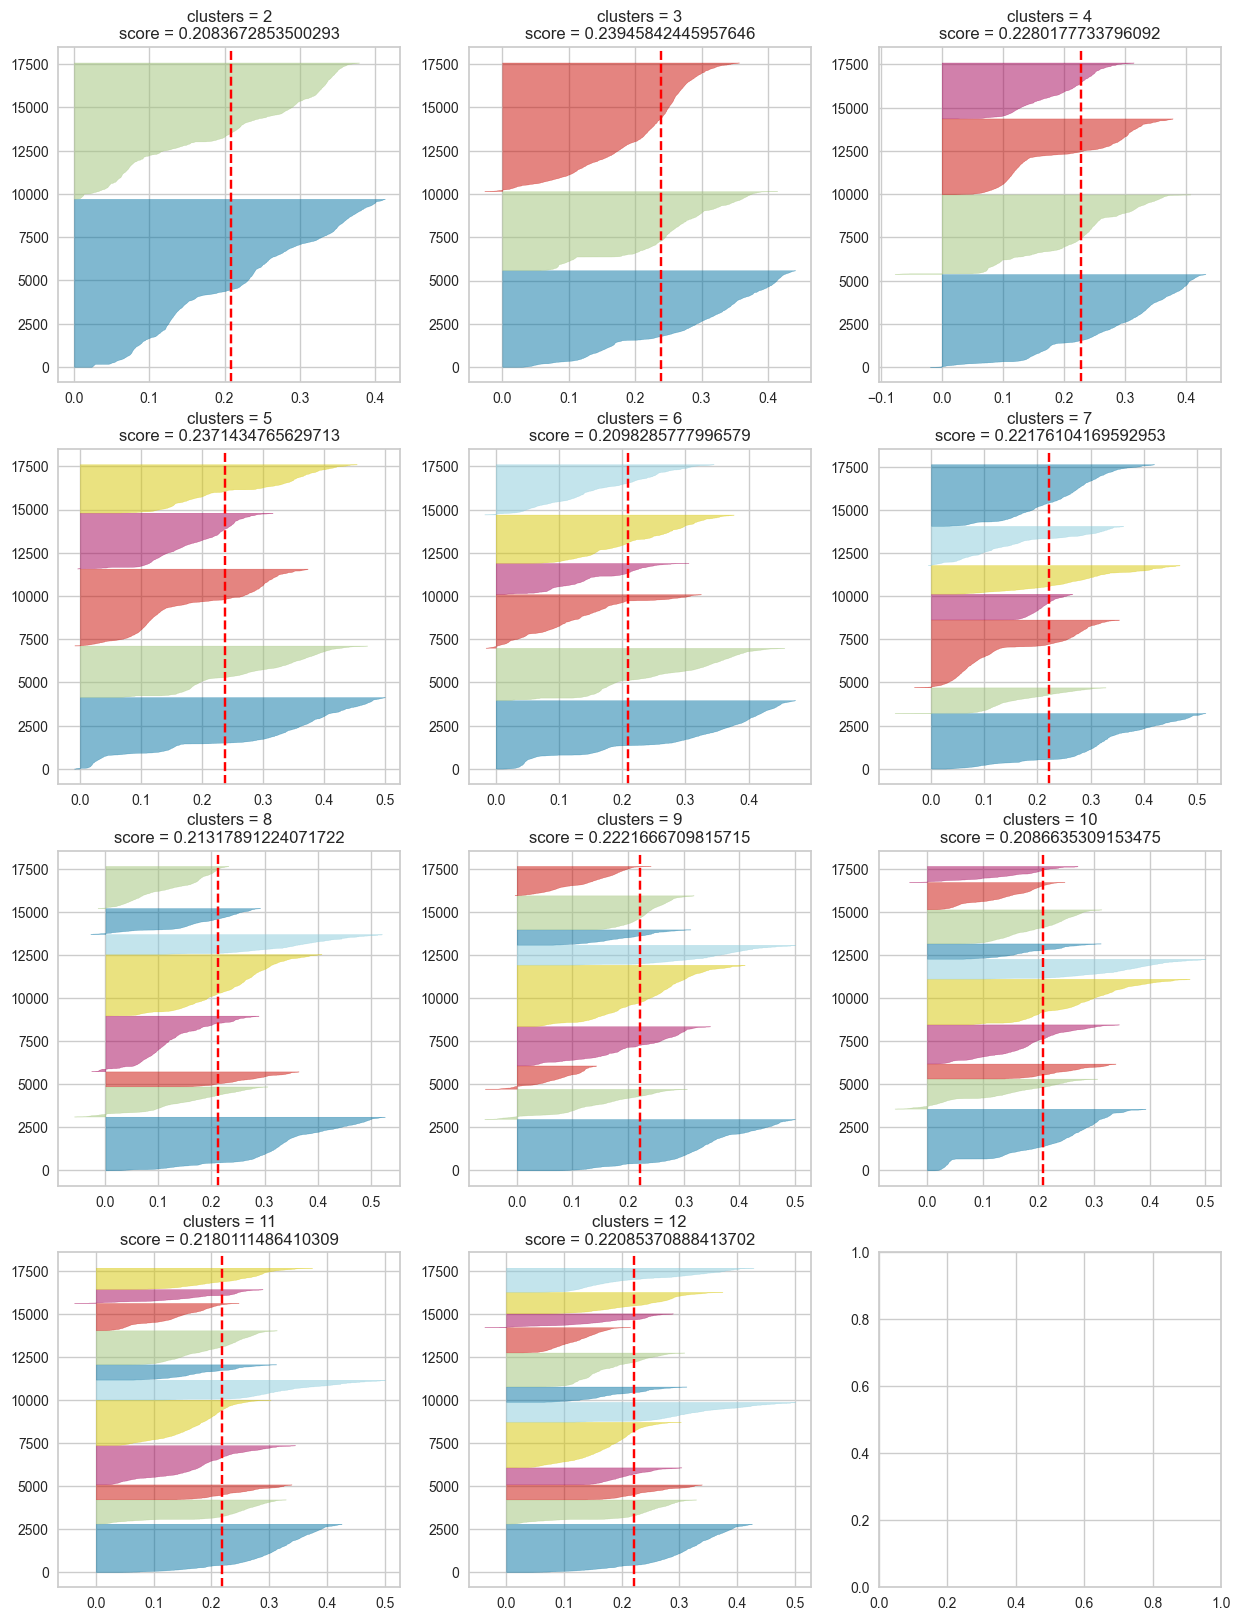

In [4]:
visualize_scores(df, sample_percentual=20, scaler="minmax", initial_range=2, final_range=13, score_types=score_types, per_col=3)


## Visualizando scores com sample de 20% porcento dos dados em formato padronizado

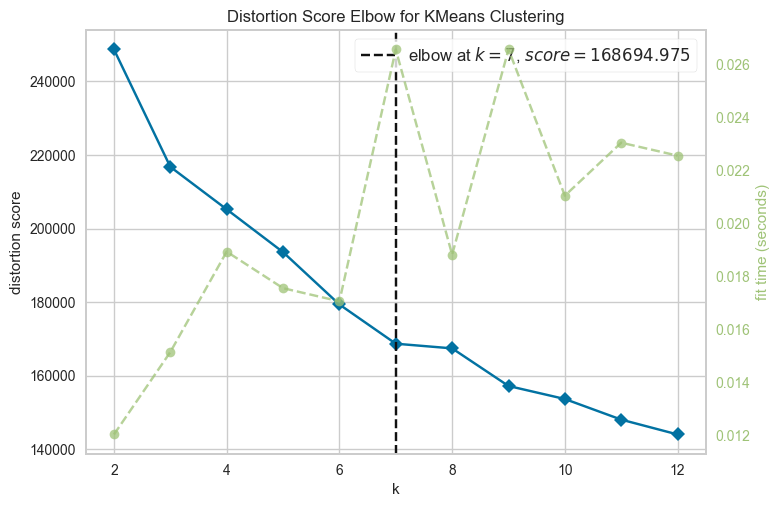

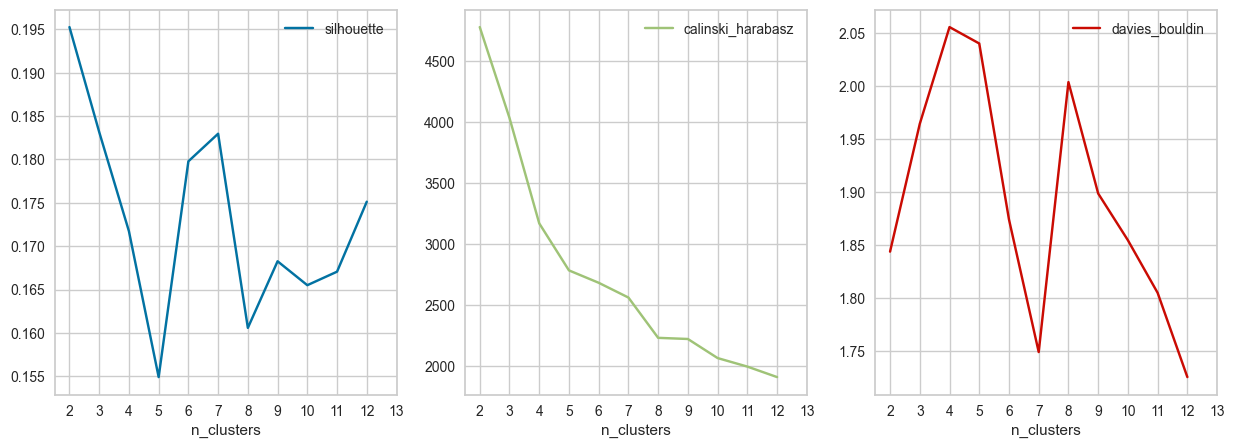

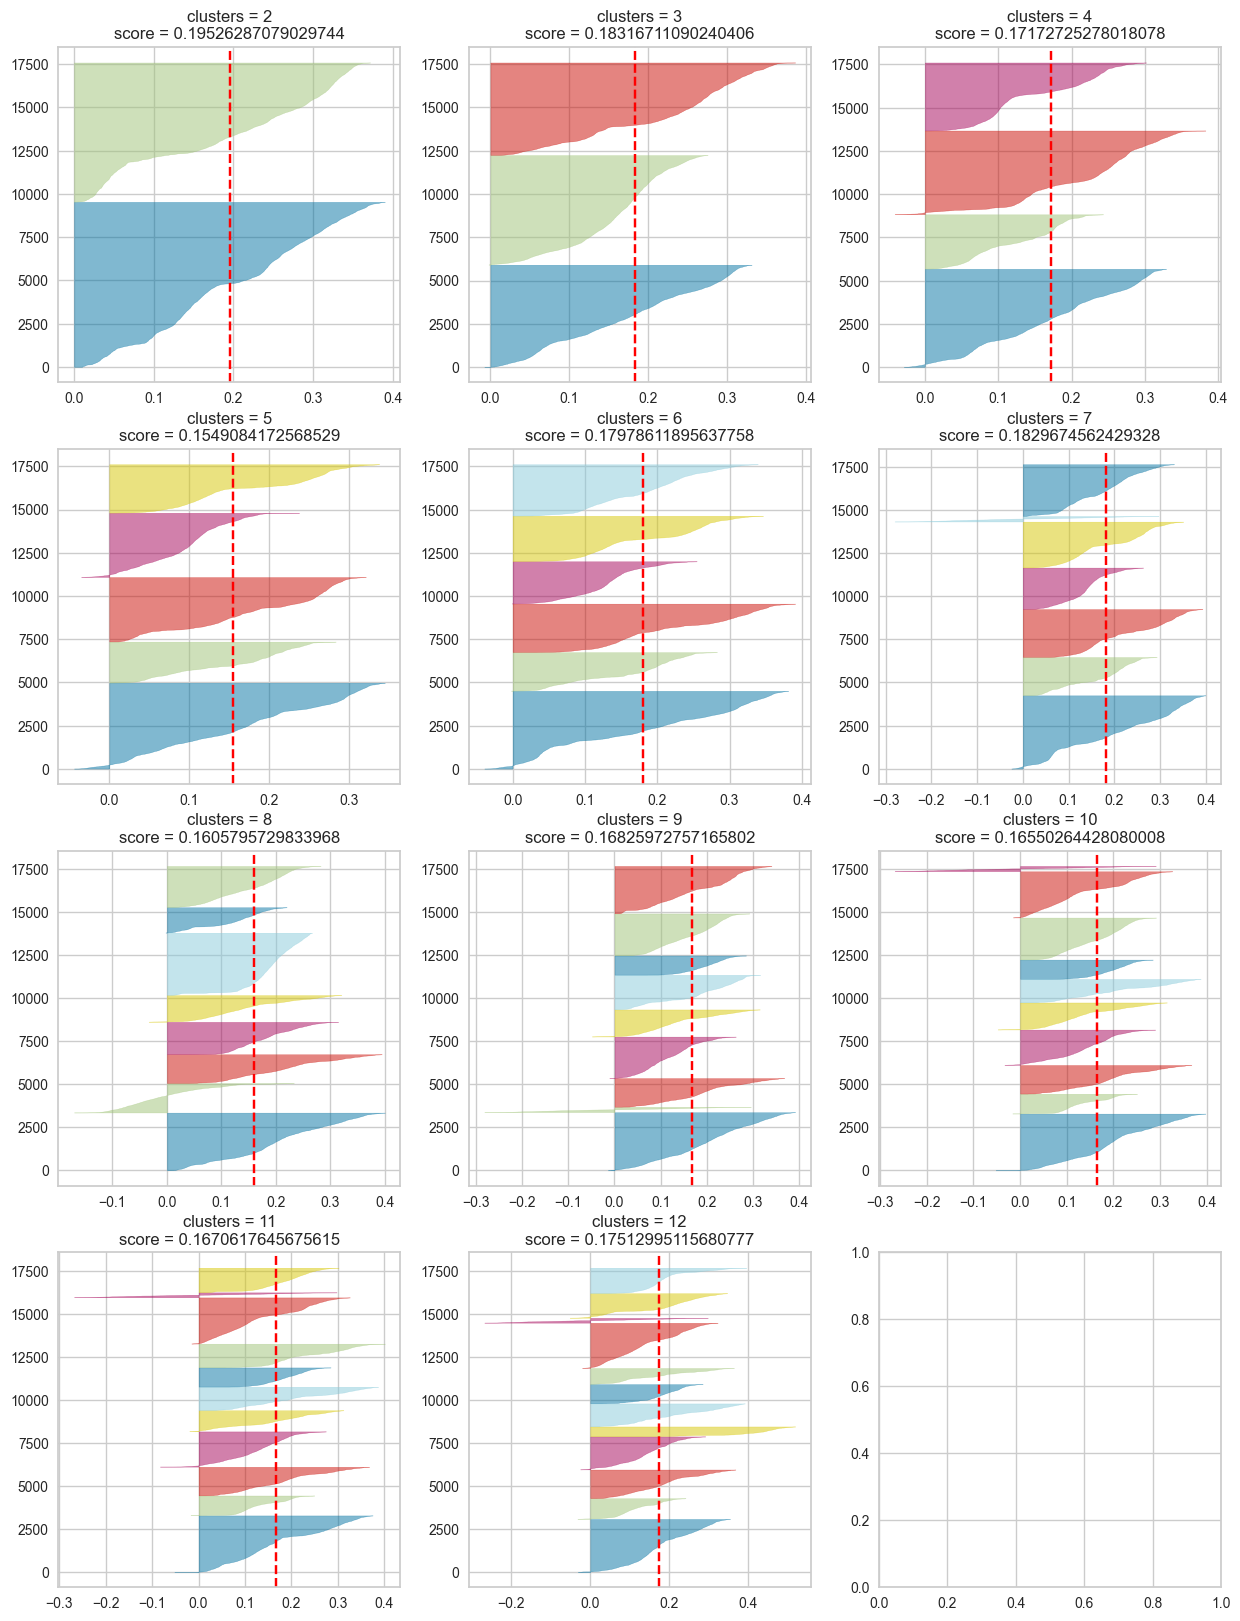

In [5]:
visualize_scores(df, sample_percentual=20,  scaler="standard", initial_range=2, final_range=13, score_types=score_types, per_col=3)


## Seguindo com os dados normalizados para 3 cluster

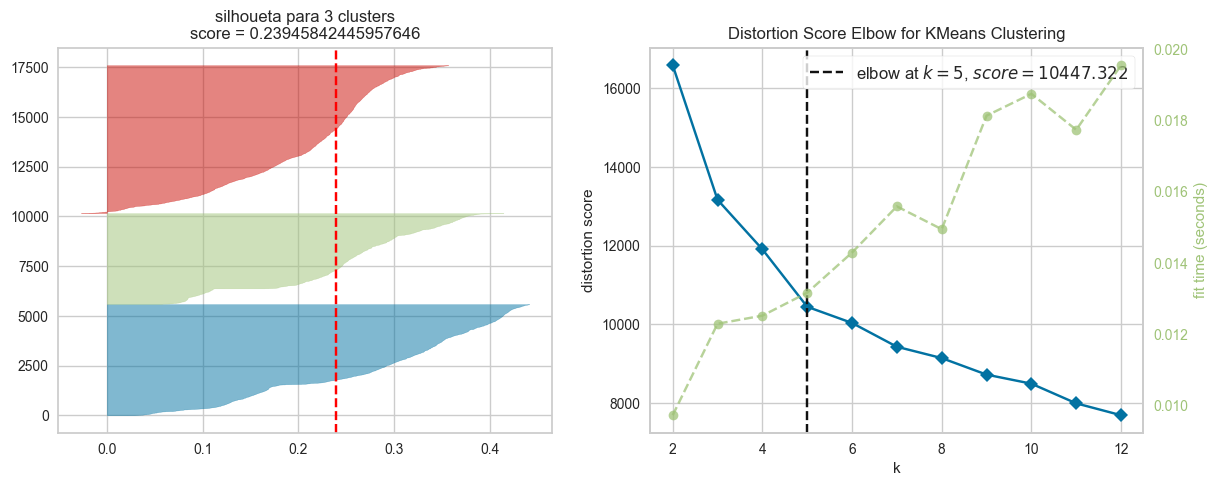

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
scaler = MinMaxScaler()
df_20_sample = scaler.fit_transform(df.sample(ceil(df.shape[0]*(20/100)), random_state=42))   

plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
km = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_20_sample)
plt.title(f"silhoueta para 3 clusters\nscore = {visualizer.silhouette_score_}")
plt.subplot(1, 2, 2)
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2, 13))
visualizer.fit(df_20_sample)
visualizer.show()

In [6]:
scaler = MinMaxScaler()
nparray_clean_normalized = scaler.fit_transform(df)

df_normalized = pd.DataFrame({f'{df.columns[i]}': nparray_clean_normalized[:,i] for i in range(nparray_clean_normalized.shape[1])})
df_normalized

,comdate_diff,price,freight_value,commercial_dates_day_since_year_start,commercial_dates_year,commercial_dates_month,commercial_dates_day,order_purchase_day_since_year_start,order_purchase_year,order_purchase_month,order_purchase_day,commercial_date_seazonal_weight,sensitivity,mean_price_by_commercial_date,std_price_by_commercial_date,commercial_date_coded,time_window_order_coded,filtered_category_coded
0,0.676923,0.070925,0.113454,0.000000,1.0,0.000000,0.000000,0.030220,1.0,0.000000,0.366667,0.000000,0.000000,0.272194,0.397345,0.777778,0.5,1.000000
1,0.076923,0.063754,0.054457,0.793296,0.5,0.818182,0.458333,0.703297,0.5,0.727273,0.433333,0.000000,0.000000,0.386880,0.366990,0.777778,0.5,0.461538
2,0.246154,0.003398,0.018990,0.184358,1.0,0.181818,0.291667,0.134615,1.0,0.090909,0.600000,0.791151,0.869875,0.340286,0.303755,0.111111,0.0,0.615385
3,0.769231,0.005865,0.034417,0.000000,1.0,0.000000,0.000000,0.046703,1.0,0.000000,0.566667,0.000000,0.000000,0.348587,0.260221,0.777778,0.5,0.230769
4,0.615385,0.024324,0.055092,0.000000,1.0,0.000000,0.000000,0.019231,1.0,0.000000,0.233333,0.169087,0.785978,0.229217,0.102753,1.000000,0.5,0.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87848,0.384615,0.013258,0.050967,1.000000,0.5,1.000000,1.000000,0.961538,0.5,1.000000,0.533333,0.263035,0.405624,0.309644,0.282365,0.666667,0.0,1.000000
87849,0.553846,0.028020,0.034564,0.251397,1.0,0.272727,0.000000,0.255495,1.0,0.272727,0.100000,0.558425,0.691618,0.337357,0.223935,0.888889,0.5,0.461538
87850,0.615385,0.008823,0.046475,0.251397,1.0,0.272727,0.000000,0.266484,1.0,0.272727,0.233333,0.558425,0.629048,0.380645,0.416230,0.888889,0.5,0.153846
87851,0.184615,0.169501,0.053871,0.913408,0.5,0.909091,0.958333,0.840659,0.5,0.909091,0.066667,0.687555,0.429234,0.793731,0.713713,0.000000,0.0,0.846154


In [7]:
n_clusters = 3
kmeans_model = KMeans(n_clusters, init="k-means++", random_state=42)
clusters = kmeans_model.fit_predict(df_normalized)
df_norm_kmeans = pd.DataFrame(df_normalized)
df_norm_kmeans

df_norm_cluster_kmeans = df_original.copy()
df_norm_cluster_kmeans["cluster"] = kmeans_model.labels_
df_norm_cluster_kmeans["hue"] = df_norm_cluster_kmeans["cluster"].map({i:f"cluster_{i}" for i in range(0, n_clusters)})
df_norm_cluster_kmeans

,comdate_diff,price,freight_value,commercial_dates_day_since_year_start,commercial_dates_year,commercial_dates_month,commercial_dates_day,order_purchase_day_since_year_start,order_purchase_year,order_purchase_month,order_purchase_day,commercial_date_seazonal_weight,sensitivity,mean_price_by_commercial_date,std_price_by_commercial_date,commercial_date_coded,time_window_order_coded,filtered_category_coded,cluster,hue
0,11,289.00,46.48,0,2018,1,1,11,2018,1,12,0.000000,0.000000,92.179011,169.492277,7,1,13,0,cluster_0
1,-28,259.90,22.31,284,2017,10,12,256,2017,9,14,0.000000,0.000000,116.931149,158.173943,7,1,6,1,cluster_1
2,-17,14.99,7.78,66,2018,3,8,49,2018,2,19,14.678600,13.587090,106.874941,134.596300,1,0,8,2,cluster_2
3,17,25.00,14.10,0,2018,1,1,17,2018,1,18,0.000000,0.000000,108.666584,118.364277,7,1,3,0,cluster_0
4,7,99.90,22.57,0,2018,1,1,7,2018,1,8,3.137149,12.276657,82.903521,59.651270,9,1,9,0,cluster_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87849,-8,55.00,20.88,358,2017,12,25,350,2017,12,17,4.880210,6.335680,100.261696,126.620747,6,0,13,1,cluster_1
87850,3,114.90,14.16,90,2018,4,1,93,2018,4,4,10.360727,10.802792,106.242859,104.834845,8,1,6,2,cluster_2
87851,7,37.00,19.04,90,2018,4,1,97,2018,4,8,10.360727,9.825480,115.585435,176.533677,8,1,2,2,cluster_2
87852,-21,689.00,22.07,327,2017,11,24,306,2017,11,3,12.756532,6.704465,204.739577,287.452591,0,0,11,1,cluster_1


## Exportando dados clusterizados

In [8]:
df_norm_cluster_kmeans.to_parquet(f"./../../data/cluster_data/df_cluster_kmeans_{n_clusters}.parquet")